In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# !source /content/drive/MyDrive/colab_env_1/bin/activate;pip install pyprojroot

In [ ]:
# pip install pyprojroot

In [ ]:
!source /content/drive/MyDrive/colab_env_1/bin/activate

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/colab_env_1/lib/python3.10/site-packages")

In [ ]:
import os
from dotenv import load_dotenv
from pyprojroot import here
load_dotenv('/content/drive/MyDrive/Env/.env')

True

In [ ]:
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

In [ ]:
import pickle
import time
import langchain
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.chains.qa_with_sources.loading import load_qa_with_sources_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredURLLoader
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
from langchain_community.document_loaders import PyPDFLoader

# file_path = (
#     "/content/sample_data/swiss_faq.pdf"
# )
# loader = PyPDFLoader(file_path)
# pages = loader.load_and_split()

# pages[0]

In [ ]:
# text_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=1000,
#     chunk_overlap=200
# )

# # As data is of type documents we can directly use split_documents over split_text in order to get the chunks.
# docs = text_splitter.split_documents(pages)


In [ ]:
# # Create the embeddings of the chunks using
# from langchain_community.embeddings import HuggingFaceEmbeddings
# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

<ipython-input-10-149b524c8fdc>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
/content/drive/MyDrive/colab_env_1/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Huggi

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

# from langchain_groq import ChatGroq
# llm = ChatGroq(
#     temperature=0.9,
#     groq_api_key='',
#     model_name="llama-3.1-70b-versatile"
# )

In [ ]:
from langchain_chroma import Chroma
vectorstore = Chroma.from_documents(
    documents=pages,
    collection_name="rag-chroma",
    embedding=embeddings,
    persist_directory="/content/drive/MyDrive/vectordb",
)

In [ ]:
from langchain_core.tools import tool
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

EMBEDDING_MODEL = "sentence-transformers/all-mpnet-base-v2"
VECTORDB_DIR = "/content/drive/MyDrive/vectordb"
K = 2

@tool
def lookup_policy(query: str)->str:
    """Consult the company policies to check whether certain options are permitted."""
    vectordb = Chroma(
    collection_name="rag-chroma",
    persist_directory=VECTORDB_DIR,
    # Use model_name instead of model
    embedding_function=HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL)
    )
    docs = vectordb.similarity_search(query, k=K)
    return "\n\n".join([doc.page_content for doc in docs])

print(lookup_policy)

name='lookup_policy' description='Consult the company policies to check whether certain options are permitted.' args_schema=<class 'langchain_core.utils.pydantic.lookup_policy'> func=<function lookup_policy at 0x7f38f77ef0a0>


In [ ]:
lookup_policy.invoke("can I cancel my ticket?")


<ipython-input-10-b0425408e77f>:16: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function=HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL)
/content/drive/MyDrive/colab_env_1/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create

"The first step is to find the Swiss Air customer service number . You can find this number on the Swiss Air website or on\nyour booking confirmation email.\nStep 2: Call the Customer Service\nOnce you have the number , call the Swiss Air customer service team. Y ou will be prompted to choose your language,\nand then you will be connected to a representative.\nStep 3: Provide your Flight Details\nProvide your flight details, including your booking reference number , flight number , and departure date. The\nrepresentative will confirm your flight details and ask you why you want to cancel your flight.\nStep 4: Confirm the Cancellation\nConfirm that you want to cancel your flight. The representative will let you know if there are any cancellation fees or\npenalties associated with your ticket, and what your refund options are.\nStep 5: Receive Confirmation\nYou will receive a confirmation email once your cancellation has been processed. Make sure to save this email for your\nrecords.\nSw

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper

api_wrapper = TavilySearchAPIWrapper(tavily_api_key=os.environ['TAVILY_API_KEY'] )

search_tool = TavilySearchResults(api_wrapper=api_wrapper,max_results=2)

In [ ]:
search_tool.invoke("What's a planet?")


[{'url': 'https://www.britannica.com/science/planet',
  'content': 'planet, (from Greek planētes, "wanderers"), broadly, any relatively large natural body that revolves in an orbit around the Sun or around some other star and that is not radiating energy from internal nuclear fusion reactions. In addition to the above description, some scientists impose additional constraints regarding characteristics such ...'},
 {'url': 'https://solarsystem.nasa.gov/planets/in-depth.amp',
  'content': 'A planet is a celestial body that (a) is in orbit around the Sun, (b) has sufficient mass for its self-gravity to overcome rigid body forces so that it assumes a hydrostatic equilibrium (nearly round) shape, and (c) has cleared the neighbourhood around its orbit.'}]

In [ ]:
from langchain_groq import ChatGroq
import os
from langchain.utilities import SQLDatabase
from langchain.tools.sql_database.tool import QuerySQLDataBaseTool
from langchain.chains import create_sql_query_chain
from langchain.prompts.prompt import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough
from operator import itemgetter
from langchain.tools import tool



sqldb_directory = ("/content/drive/MyDrive/Database/travel.sqlite")
sql_llm = ChatGroq(
    temperature=0.0,
    groq_api_key=os.environ['GROQ_API_KEY'] ,
    model_name="llama-3.1-70b-versatile"
)
# llm = ChatOpenAI(model="gpt-4o-mini")
# llm = ChatOpenAI(model="gpt-4o")
system_role = """Given the following user question, corresponding SQL query, and SQL result, answer the user question.\n
    Question: {question}\n
    SQL Query: {query}\n
    SQL Result: {result}\n
    Answer:
    """
db = SQLDatabase.from_uri(
    f"sqlite:///{sqldb_directory}")

# Disable sample rows retrieval to avoid the type error.
db._sample_rows_in_table_info = False

execute_query = QuerySQLDataBaseTool(db=db)
write_query = create_sql_query_chain(
    sql_llm, db)
answer_prompt = PromptTemplate.from_template(
    system_role)


answer = answer_prompt | sql_llm | StrOutputParser()
chain = (
    RunnablePassthrough.assign(query=write_query).assign(
        result=itemgetter("query") | execute_query
    )
    | answer
)

# Test the chain
# message = "How many tables do I have in the database? and what are their names?"
# response = chain.invoke({"question": message})
@tool
def query_sqldb(query):
    """Query the Swiss Airline SQL Database and access all the company's information. Input should be a search query."""
    response = chain.invoke({"question": query})
    return response


In [ ]:
message = "How many tables do I have in the database? and what are their names?"


In [ ]:
response = query_sqldb.invoke(message)
print(response)

The SQL query provided is incorrect due to the inclusion of the user question and the text "SQLQuery:" in the query itself. The correct SQL query should be:

```sql
SELECT "name" FROM sqlite_master WHERE "type" = 'table'
```

However, since the query was not executed correctly due to the syntax error, we cannot provide the exact number of tables and their names.

To answer the user's question, you would need to execute the corrected SQL query. The result would be a list of table names in the database. The number of tables would be the number of rows returned by the query.

For example, if the query returns the following result:

| name    |
|---------|
| table1  |
| table2  |
| table3  |

Then, the answer to the user's question would be:

You have 3 tables in the database, and their names are:

1. table1
2. table2
3. table3


In [ ]:
# Wrap up the tools into a list

tools = [search_tool, lookup_policy, query_sqldb]


In [ ]:
# Load the LLM for the primary agent and bind it with the tools

from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature=0.9,
    groq_api_key='',
    model_name="llama-3.1-70b-versatile"
)

In [ ]:
# Tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
# Define the Graph Nodes

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [ ]:
#  Second node: BasicToolNode that runs the appropriate tool based on the primary agent's output
import json
from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[search_tool, lookup_policy, query_sqldb])
graph_builder.add_node("tools", tool_node)


In [ ]:
from langgraph.graph import END, MessagesState
from typing import Literal

# Define the function that determines whether to continue or not
def should_continue(state: MessagesState) -> Literal["tools", END]:
    messages = state['messages']
    last_message = messages[-1]
    # If the LLM makes a tool call, then we route to the "tools" node
    if last_message.tool_calls:
        return "tools"
    # Otherwise, we stop (reply to the user)
    return END

graph_builder.add_conditional_edges(
    "chatbot",
    should_continue,
    ["tools", END],
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

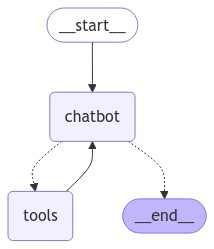

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
# #Save the grpah
# save = False

# if save:
#     from PIL import Image as PILImage
#     import io
#     # Assuming graph.get_graph().draw_mermaid_png() returns PNG binary data
#     try:
#         # Generate the PNG image from the graph
#         png_data = graph.get_graph().draw_mermaid_png()

#         # Convert the binary data into an image
#         img = PILImage.open(io.BytesIO(png_data))

#         # Save the image locally with 300 DPI
#         img.save('output_image.png', 'PNG', dpi=(300, 300))

#         print("Image saved successfully with 300 DPI.")
#     except Exception as e:
#         print(f"Error: {e}")

In [ ]:
config = {"configurable": {"thread_id": "1"}}


In [ ]:
# First query

# Approach 1: Print all the steps the the system goes through ti get the final output


user_input = "Hi there! My name is Varun."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Varun.
================================== Ai Message ==================================

Hello Varun. How can I assist you today?


In [ ]:
# Approach 2: Just print the final output

from langchain_core.messages import HumanMessage
user_input = "Hi there! My name is Varun."

# Use the Runnable
final_state = graph.invoke(
    {"messages": [HumanMessage(content=user_input)]},
    config=config
)
final_state["messages"][-1].content

'Hello again, Varun. Is there something I can help you with?'

In [ ]:
user_input = "Can I cancel my ticket 10 hours before the flight?"

events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Can I cancel my ticket 10 hours before the flight?
================================== Ai Message ==================================
Tool Calls:
  lookup_policy (call_n3j4)
 Call ID: call_n3j4
  Args:
    query: cancellation policy 10 hours before flight


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


================================= Tool Message =================================
Name: lookup_policy

"hour cancellation policy that allows passengers to cancel their flights within 24 hours of booking at +1-877-507-7341\nwithout penalty . This policy applies to all fare types, including non-refundable tickets. If you cancel your Swiss Airlines\nflight within 24 hours of booking, you'll receive a full refund of your ticket price.\nHow to Cancel Swiss Airlines Flight within 24 Hours? If you need to cancel your Swiss Airlines flight within 24 hours of\nbooking, you can do so easily online. Here are the steps to follow:\nGo to Swiss Airlines' website and click on the \"Manage your bookings\" tab. Enter your booking reference number and last\nname to access your booking. Select the flight you want to cancel and click on \"Cancel flight.\" Confirm your cancellation\nand you'll receive a full refund of your ticket price. If you booked your Swiss Airlines flight through a travel agent, you'll

In [ ]:
user_input = "Do you Know Jaun Elia. I want the youtube link to his shayari"

events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Do you Know Jaun Elia. I want the youtube link to his shayari
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_3g6z)
 Call ID: call_3g6z
  Args:
    query: Jaun Elia shayari youtube
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.youtube.com/watch?v=dz7tJ8Vkp4A", "content": "Jaun Elia | Best Collection | Jaun Elia Ashar | Jaun Elia Poetry #shayari #urdupoetry #jaunelia #jauneliapoetry Embracing Jaun Elia's Verses: Subscri..."}, {"url": "https://www.youtube.com/watch?v=AH1PxSQhUWw", "content": "This is a shayri video and the video contains the poetries from Jaun Elia. If you want to get updated please subscribe my channel and press the bell iconIn t..."}]
================================== Ai Message ==================================

Here 

In [ ]:
event

{'messages': [HumanMessage(content='Hi there! My name is Varun.', additional_kwargs={}, response_metadata={}, id='41e85ec9-f901-4969-b116-11333d607900'),
  AIMessage(content='Hello Varun. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 429, 'total_tokens': 441, 'completion_time': 0.048059886, 'prompt_time': 0.116486124, 'queue_time': 0.10526923700000002, 'total_time': 0.16454601}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b6828be2c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-e18ab197-02c7-401a-8dd2-d56d0c944d1c-0', usage_metadata={'input_tokens': 429, 'output_tokens': 12, 'total_tokens': 441}),
  HumanMessage(content='Hi there! My name is Farzad.', additional_kwargs={}, response_metadata={}, id='9ad18d10-9151-41de-b0bb-82599bfbc800'),
  AIMessage(content='Hello Farzad. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_toke